In [10]:
import matplotlib.pyplot as plt
import numpy as np
from pyusadel import DifferentialOperators, UsadelProblem
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit


class ModelFitting:
    def __init__(
        self, e_ax_exp, n_exp, include_sf=False, include_so=False, include_Dynes=False
    ):

        self.e_ax_exp = e_ax_exp
        self.n_exp = n_exp
        self.include_sf = include_sf
        self.include_so = include_so
        self.inclde_Dynes = inclde_Dynes

        # Interpolate experimental data
        self.n_exp_int = interp1d(self.e_ax_exp, self.n_exp)

        # Prepare variables for model parameters
        self.N0 = np.array([1])
        self.Delta = np.array([1])
        self.h = np.array([0.1])
        self.tau_sf_inv = np.array([0.0])
        self.tau_so_inv = np.array([0])
        self.Dynes = np.array([0])

    def solve_model(self):
        # The system is homogeneous in space, so it has only one site
        Nsites = 1

        # The system is homogeneous in space, so the differential operators are trivial null matrices
        do = DifferentialOperators()
        do.D_x = np.zeros((1, 1), dtype=float)
        do.D_y = np.zeros((1, 1), dtype=float)
        do.D_z = np.zeros((1, 1), dtype=float)
        do.L = np.zeros((1, 1), dtype=float)

        # Define the parameters of the problem
        h_x = self.h_x
        h_y = np.array([0])
        h_z = np.array([0])
        tau_sf_inv = self.tau_sf_inv
        tau_so_inv = self.tau_so_inv
        D = 0
        T = 0.1

        # Setup the Usadel problem
        up = UsadelProblem(
            Nsites=1,
            diff_ops=do,
            h_x=h_x,
            h_y=h_y,
            h_z=h_z,
            tau_sf_inv=tau_sf_inv,
            tau_so_inv=tau_so_inv,
            D=D,
            T=T,
        )
        
        up.Delta = self.Delta

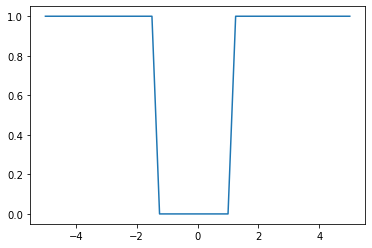

In [11]:
e_ax = np.linspace(-5, 5, 41)
n = e_ax * 0 + 1
n[15:25] = 0


n_int = interp1d(e_ax, n)

plt.plot(e_ax, n_int(e_ax))